# Regresión múltiple

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scikit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 110

In [2]:
df = pd.read_csv('../data/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot: >

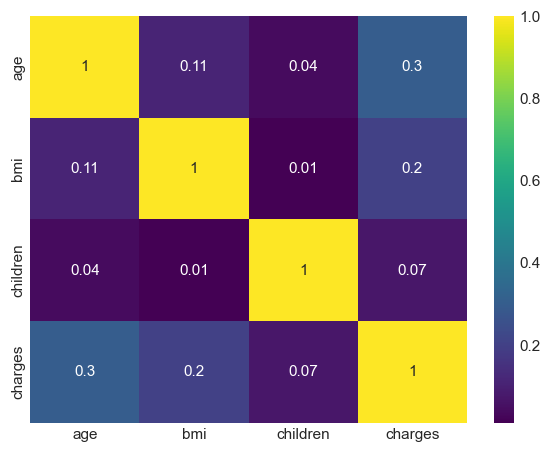

In [5]:
sns.heatmap(df.corr(numeric_only=True).round(2),cmap='viridis',annot=True)

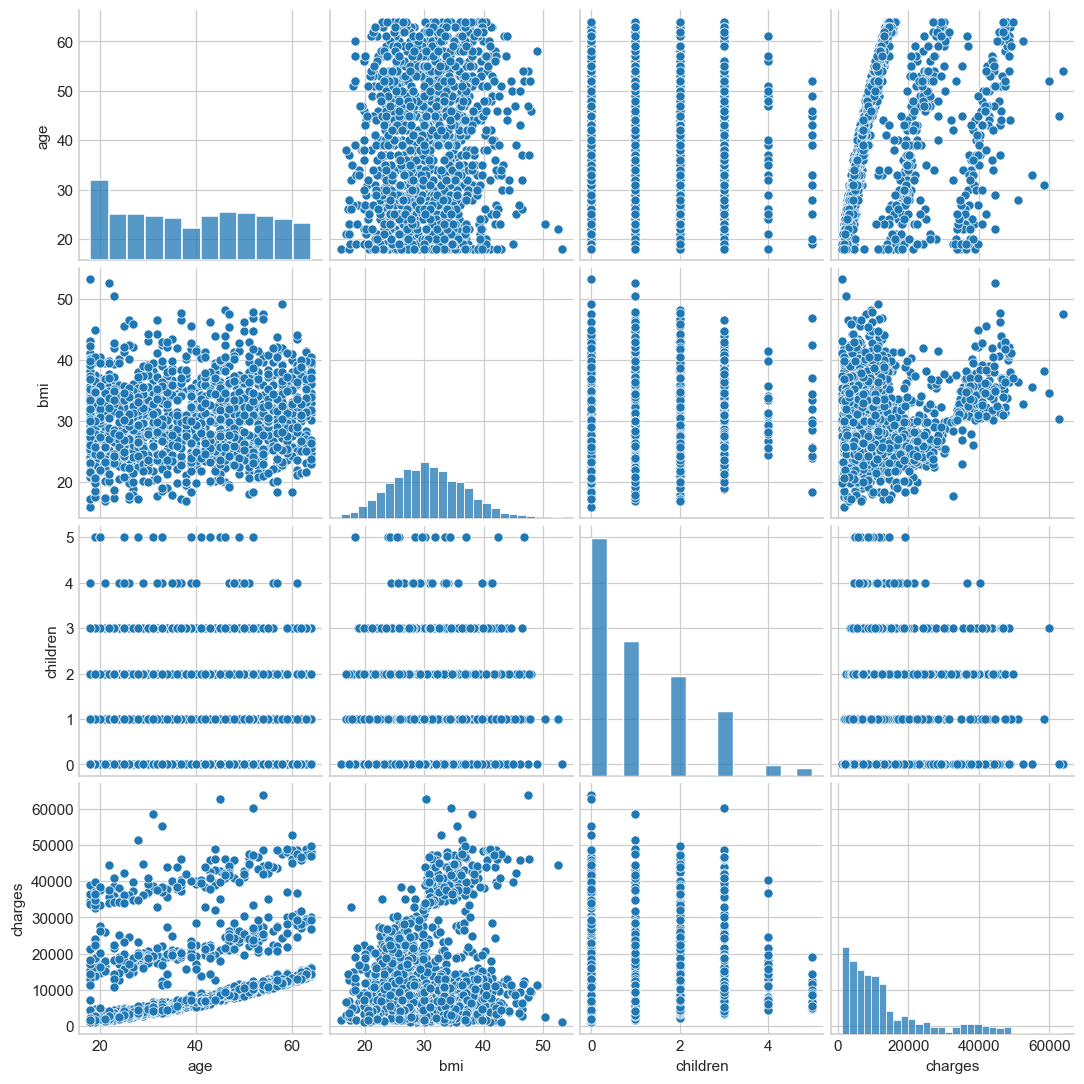

In [6]:
sns.pairplot(df)

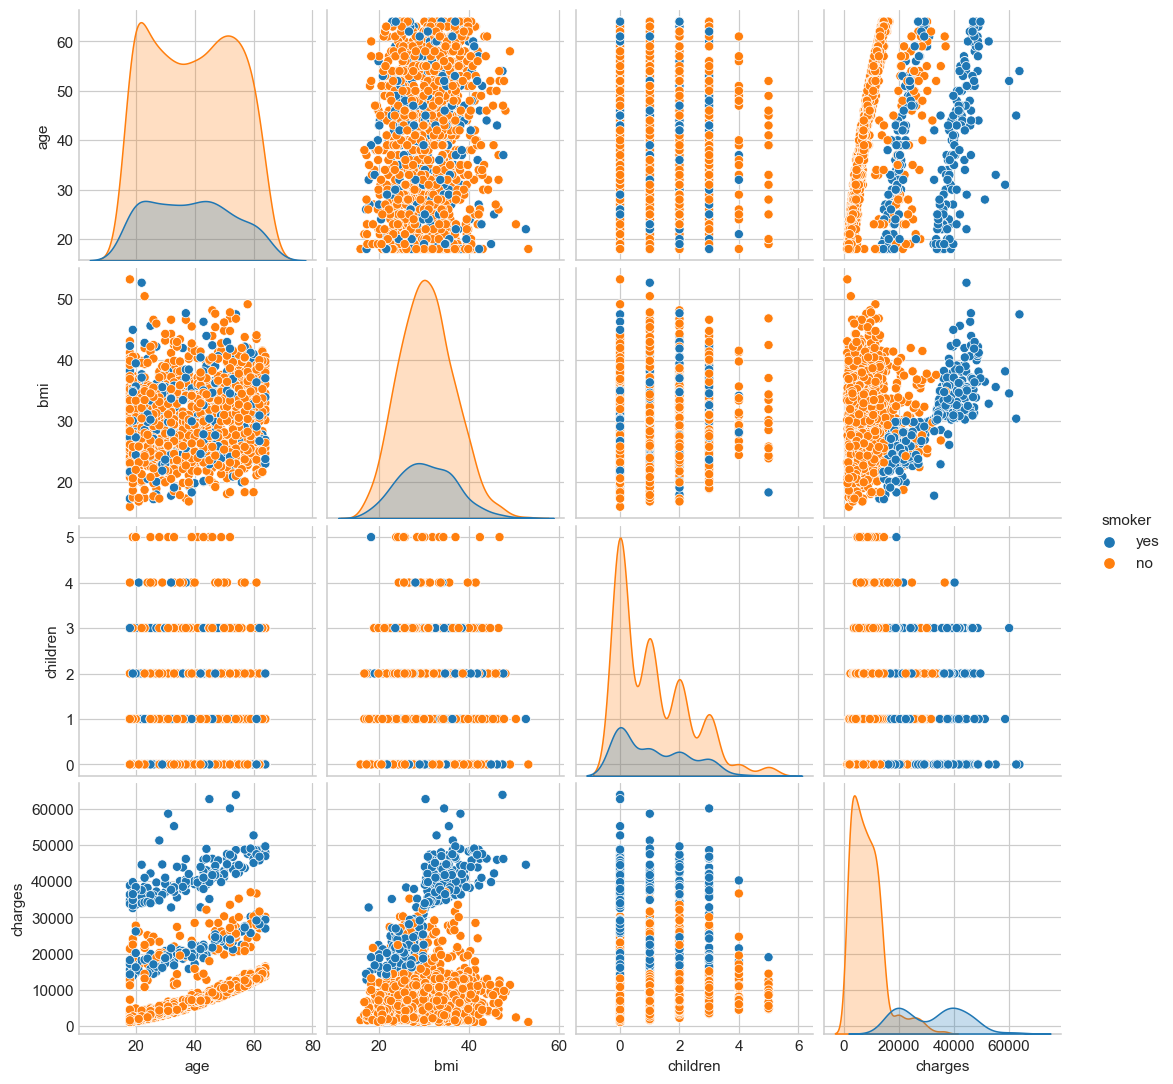

In [7]:
sns.pairplot(df, hue='smoker')

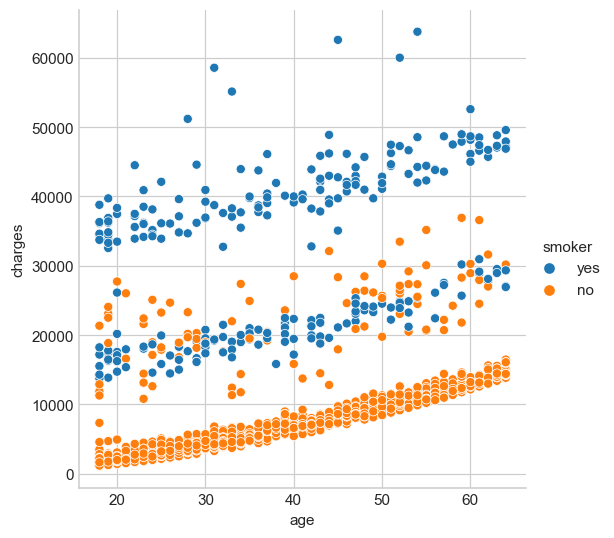

In [8]:
sns.relplot(data=df, x='age', y='charges', hue='smoker')

<AxesSubplot: >

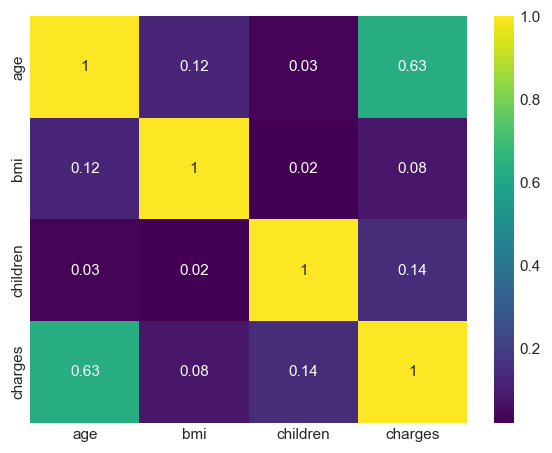

In [9]:
df_non_smokers = df[df['smoker'] == 'no']
sns.heatmap(df_non_smokers.corr(numeric_only=True).round(2),cmap='viridis',annot=True)

## 1. Regresión lineal simple

In [10]:
model = LinearRegression()

In [11]:
X = df_non_smokers[['age']]
y = df_non_smokers['charges']
print('The type of X is ', type(X))
print('The type of y is ', type(y))

The type of X is  <class 'pandas.core.frame.DataFrame'>
The type of y is  <class 'pandas.core.series.Series'>


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.41983074246467844
The rmse is:  4465.016118873747


## 2. Regresión múltiple

Se utilizan múltiples variables de entrada

In [15]:
X = df_non_smokers[['age', 'bmi', 'children']]
y = df_non_smokers['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

predictions = multi_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.4070850052545696
The rmse is:  4630.449008082401


In [16]:
df['smoker_int'] = df['smoker'].map({'yes':1, 'no':0})
X = df[['age', 'bmi', 'smoker_int']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

predictions = multi_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.7393643362439519
The rmse is:  6095.751596595906


In [17]:
print(multi_model.coef_)

[  261.61097241   340.83025883 25221.14468976]


In [18]:
print(multi_model.intercept_)

-12488.762934092332


In [19]:
coefficients = multi_model.coef_
intercept = multi_model.intercept_

def calculate_charges(age, bmi, smoker):
    return (age * coefficients[0]) + (bmi * coefficients[1]) + (smoker * coefficients[2]) + intercept

In [20]:
# Predicting charges
print(calculate_charges(33, 22, 0))

3642.6648497100487


In [21]:
X_example = pd.DataFrame(data=[[33, 22, 0]], columns=['age', 'bmi', 'smoker_int'])
multi_model.predict(X_example)
# multi_model.predict([[33, 22, 0]])

array([3642.66484971])


variable sex:
You could convert the values to 0 and 1, as they are represented by binary values.

variable region:
Since these are not binary variables, you cannot encode them as 0 and 1. However, it probably does not make sense to encode them as 0, 1, 2, … This is because there is no intrinsic hierarchy in them. Read this article on one-hot encoding and see how you can build the region variable into the model.